# Imports

In [ ]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import *
from qiskit import QuantumCircuit, Aer
from qiskit import IBMQ
from qiskit.visualization import plot_histogram

IBMQ.load_account()

# Functions to create a AQFT and the add part of the AQFTA circuit

In [2]:
def qft(circuit, n):
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    # circuit.cp(pi/2, n-1, n)
    if (n != 0):
        circuit.cp(pi/2, n-1, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft(circuit, n)

In [3]:
def phaseAdd(circ, regLen):
    circuit = QuantumCircuit(regLen*2, name='Add')
    for i in range(regLen):
        for j in range(i, regLen):
            circuit.cp((pi)/(2)**(j-i), i, regLen+j)

    circ.append(circuit, circ.qubits)
    return circuit

In [4]:
qft2 = QuantumCircuit(2, name='QFT')
qft(qft2, 2)

qfti2 = qft2.inverse()
qfti2.name = 'IQFT'

In [5]:
qft3 = QuantumCircuit(3, name='QFT')
qft(qft3, 3)

qfti3 = qft3.inverse()
qfti3.name = 'IQFT'

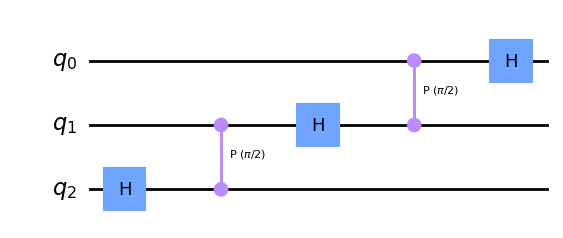

In [6]:
qft3.draw('mpl')

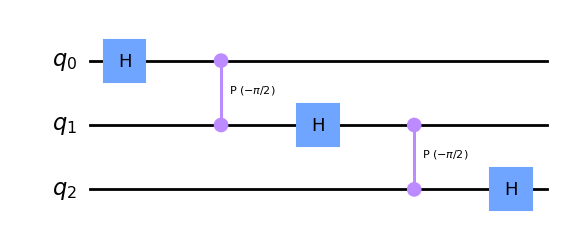

In [7]:
qfti3.draw('mpl')

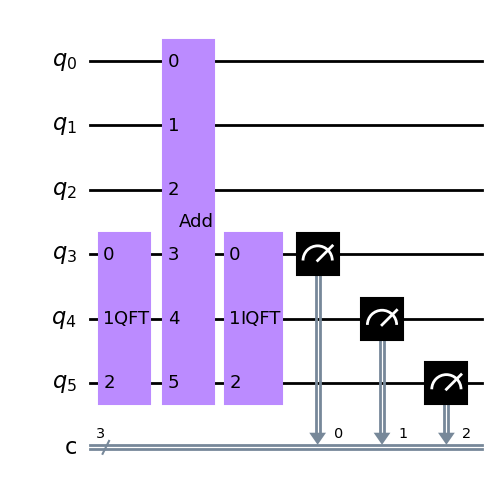

In [8]:
adder = QuantumCircuit(6,3)
adder.append(qft3, adder.qubits[3:])
phaseAdd(adder, 3)
adder.append(qfti3, adder.qubits[3:])
adder.measure([3,4,5], [0,1,2])
adder.draw('mpl')

# Function that takes in 2, 2 bit binary number and returns the sum

In [9]:
def sum2(a, b):
    a = list(a[::-1])
    b = list(b[::-1])
    a = [i for i, x in enumerate(a) if x == '1']
    b = [i+2 for i, x in enumerate(b) if x == '1']
    adder = QuantumCircuit(4,2)
    if (a):
        adder.x(a)
    if (b):
        adder.x(b)
    adder.append(qft2, adder.qubits[2:])
    phaseAdd(adder, 2)
    adder.append(qfti2, adder.qubits[2:])
    adder.measure([2,3], [0,1])
    return adder
    

Classical simulation

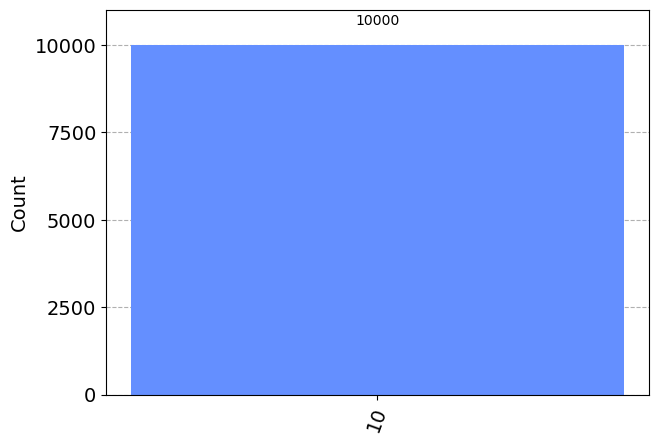

In [10]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
adder = sum2(a, b)
simulator = Aer.get_backend('qasm_simulator')
job = execute(adder, simulator, shots=10000)
result = job.result().get_counts()
plot_histogram(result)

Run on Quantum computer

ibmqfactory.load_account:WARNING:2023-04-27 22:01:22,644: Credentials are already in use. The existing account in the session will be replaced.


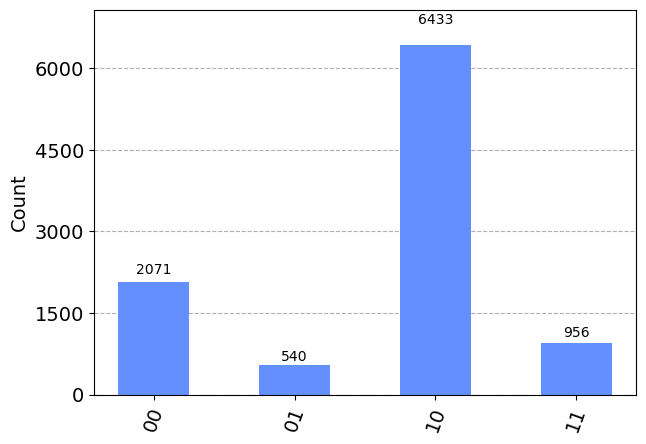

In [14]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
adder = sum2(a, b)
#run on real quantum computer
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibm_nairobi')
job = execute(adder, backend, shots=10000)
result = job.result().get_counts()
plot_histogram(result)

# Function that takes in 2, 3 bit binary number and returns the sum

In [15]:
def sum3(a, b):
    a = list(a[::-1])
    b = list(b[::-1])
    a = [i for i, x in enumerate(a) if x == '1']
    b = [i+3 for i, x in enumerate(b) if x == '1']
    adder = QuantumCircuit(6,3)
    if (a):
        adder.x(a)
    if (b):
        adder.x(b)
    adder.append(qft3, adder.qubits[3:])
    phaseAdd(adder, 3)
    adder.append(qfti3, adder.qubits[3:])
    adder.measure([3,4,5], [0,1,2])

    return adder
    

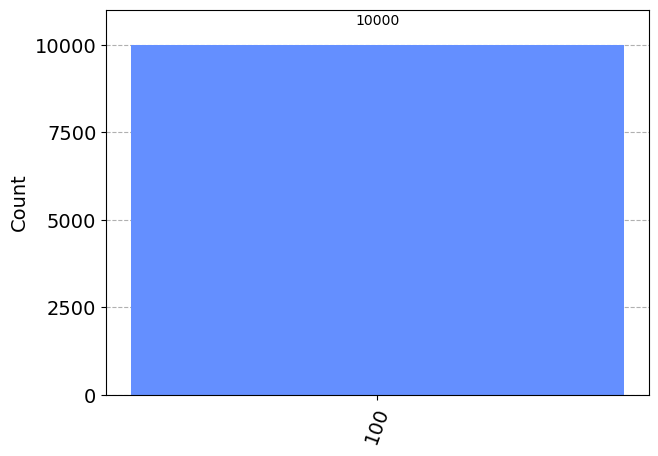

In [16]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
adder = sum3(a, b)
simulator = Aer.get_backend('qasm_simulator')
job = execute(adder, simulator, shots=10000)
result = job.result().get_counts()
plot_histogram(result)

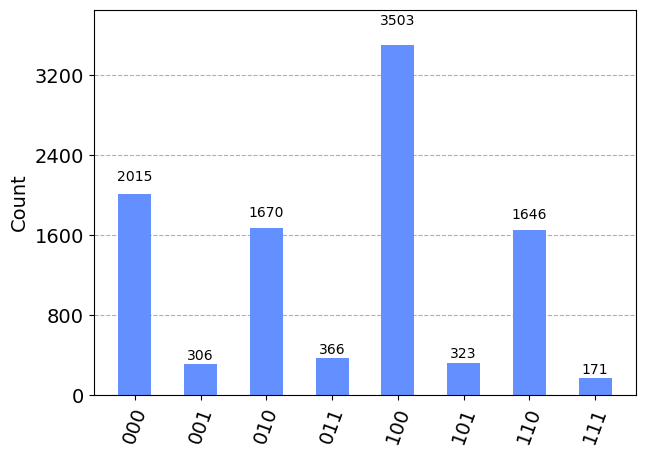

In [17]:
a = input('What is the first binary number?')
b = input('What is the second binary number?')
adder = sum3(a, b)
#run on real quantum computer
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibm_nairobi')
job = execute(adder, backend, shots=10000)
result = job.result().get_counts()
plot_histogram(result)